In [99]:
import dlib
import cv2
import numpy as np
from faceDection import *
from collections import OrderedDict
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
%matplotlib inline

In [100]:
imgpath='data/face7.jpeg'

In [101]:
img,bbox,shape=detectFace(imgpath)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [102]:
# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 48)),
	("nose", (27, 35)),
	("jaw", (0, 17))
])

In [103]:
right_eyebrow=FACIAL_LANDMARKS_IDXS['right_eyebrow']
right_eyebrow_pts=shape[right_eyebrow[0]:right_eyebrow[1]]
right_eyebrow_pts_hull=shape[right_eyebrow[0]:right_eyebrow[1]]

In [104]:
right_eyebrow_pts

array([[152, 231],
       [169, 207],
       [198, 199],
       [226, 200],
       [256, 205]])

In [105]:
def drawLine(img,pts,color=(255,0,0)):
    for i in range(1,len(pts)):
        cv2.line(img,tuple(pts[i-1]),tuple(pts[i]),color,2)
    cv2.line(img,tuple(pts[0]),tuple(pts[-1]),color,2)
    return img

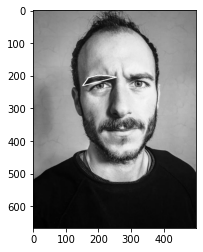

In [106]:
img=drawLine(img,right_eyebrow_pts)
# img=drawLine(img,right_eyebrow_pts_hull,(0,255,0))
plt.imshow(img,'gray')

In [97]:
def mytest():
    minxy=right_eyebrow_pts_hull.min(axis=0)
    maxxy=right_eyebrow_pts_hull.max(axis=0)
    
    X,Y=np.meshgrid(range(minxy[0],maxxy[0]),range(minxy[1],maxxy[1]),indexing='ij')
    X=X.ravel()
    Y=Y.ravel()
    ret=[]
    for x,y in zip(X,Y):
        if cv2.pointPolygonTest(right_eyebrow_pts_hull,(x,y),False)>0:
            ret.append((x,y))
    return np.array(ret),np.vstack((X,Y)).T

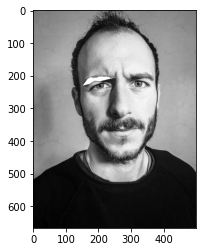

In [98]:
#(n,2) n表示顶点数量,眉毛的hull
xy_hull,xy_box=mytest()
I=np.zeros(img.shape,dtype='uint8')
I=img.copy()
# I[xy_box[:,1],xy_box[:,0],:]=255
# I[xy_hull[:,1],xy_hull[:,0],:]=np.array([0,255,0])

ROI=I[xy_hull[:,1],xy_hull[:,0]]
MASK=(ROI<np.mean(ROI)+0.5*np.std(ROI))
I[xy_hull[:,1],xy_hull[:,0]]=I[xy_hull[:,1],xy_hull[:,0]]*(1-MASK)+(MASK)*255
plt.imshow(I,'gray')

In [77]:
I_MASK=np.zeros(img.shape,dtype='uint8')
I_MASK[xy_hull[:,1],xy_hull[:,0]]=MASK
print(I_MASK.dtype)
_,I_MASK=cv2.threshold(I_MASK,0,255,cv2.THRESH_BINARY)
print(I_MASK.dtype)

uint8
uint8


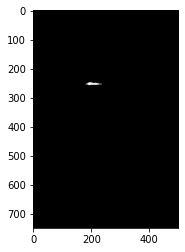

In [78]:
plt.imshow(I_MASK,'gray')

In [ ]:
def drawArrow(A, direction, ax,color,size):
    '''
    Draws arrow on specified axis from (x, y) to (x + dx, y + dy).
    Uses FancyArrow patch to construct the arrow.

    The resulting arrow is affected by the axes aspect ratio and limits.
    This may produce an arrow whose head is not square with its stem.
    To create an arrow whose head is square with its stem, use annotate() for example:
    Example:
        ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
        arrowprops=dict(arrowstyle="->"))
    '''
    # fig = plt.figure()
    #     ax = fig.add_subplot(121)
    # fc: filling color
    # ec: edge color
    ax.arrow(A[0], A[1], direction[0], direction[1],
             length_includes_head=True,  # 增加的长度包含箭头部分
             head_width=size, head_length=size*2, fc='g', ec=color)
    # 注意： 默认显示范围[0,1][0,1],需要单独设置图形范围，以便显示箭头
    
def analysis(Q):
    u = np.mean(Q, axis=0)
    U, S, V = np.linalg.svd(Q)
    return u,V[:,0],V[:,1]

cnts=cv2.findContours(I_MASK,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
ss=cnts[0].squeeze()
uu,v1,v2=analysis(ss)
ax=plt.subplot(111)
ax.set_aspect('equal')

plt.scatter(ss[:,0],ss[:,1]) 
plt.scatter(uu[0],uu[1]) 
drawArrow(uu,v1*100,ax,'r',0.1)
drawArrow(uu,v2*100,ax,'g',0.1)

In [ ]:
print(v1)